In [1]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [9]:
data = pd.read_excel('C:/marketing/data.xlsx')
a = data.sort_values("실시간비율", ascending = False, ignore_index = True)[:100]
b = []
for i in range(100):
    b.append(str(a.loc[i, "날짜"])[:10].replace("-",""))
b[:5]

['20210225', '20210226', '20210227', '20210301', '20210228']

In [13]:
e = []
for n, y in enumerate(b):
    e.append((n,y))
e[:10]

[(0, '20210225'),
 (1, '20210226'),
 (2, '20210227'),
 (3, '20210301'),
 (4, '20210228'),
 (5, '20210505'),
 (6, '20210302'),
 (7, '20210303'),
 (8, '20210304'),
 (9, '20211025')]

In [14]:
len(e)

100

In [15]:
error = []
for n, y in e:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data5/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error.append(1)
    else:
        print("Done")
        error.append(0)

n = 0 y = 20210225
Done
n = 1 y = 20210226
Done
n = 2 y = 20210227
Done
n = 3 y = 20210301
Done
n = 4 y = 20210228
Done
n = 5 y = 20210505
Done
n = 6 y = 20210302
ERROR1
n = 7 y = 20210303
ERROR1
n = 8 y = 20210304
Done
n = 9 y = 20211025
Done
n = 10 y = 20210305
Done
n = 11 y = 20221015
ERROR1
n = 12 y = 20210306
Done
n = 13 y = 20210310
ERROR1
n = 14 y = 20210309
Done
n = 15 y = 20210323
Done
n = 16 y = 20210308
Done
n = 17 y = 20210307
Done
n = 18 y = 20210312
Done
n = 19 y = 20211005
Done
n = 20 y = 20210311
Done
n = 21 y = 20221030
Done
n = 22 y = 20210313
Done
n = 23 y = 20210320
Done
n = 24 y = 20230420
Done
n = 25 y = 20210314
Done
n = 26 y = 20210325
Done
n = 27 y = 20210315
Done
n = 28 y = 20210316
Done
n = 29 y = 20210324
Done
n = 30 y = 20210318
Done
n = 31 y = 20210317
Done
n = 32 y = 20210319
Done
n = 33 y = 20210412
ERROR1
n = 34 y = 20210326
Done
n = 35 y = 20211018
Done
n = 36 y = 20210329
Done
n = 37 y = 20210506
Done
n = 38 y = 20210417
Done
n = 39 y = 20210322
Done


In [17]:
retry = [e[i] for i in range(len(error)) if error[i] == 1]
print(len(retry))
print("="*25)
print(retry)

11
[(6, '20210302'), (7, '20210303'), (11, '20221015'), (13, '20210310'), (33, '20210412'), (48, '20210402'), (51, '20221230'), (59, '20210427'), (74, '20210608'), (82, '20210423'), (98, '20221016')]


In [18]:
len(error)

100

In [19]:
error2 = []
for n, y in retry:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data5/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR2")
        error2.append(1)
    else:
        print("Done")
        error2.append(0)

n = 6 y = 20210302
Done
n = 7 y = 20210303
Done
n = 11 y = 20221015
Done
n = 13 y = 20210310
Done
n = 33 y = 20210412
Done
n = 48 y = 20210402
Done
n = 51 y = 20221230
Done
n = 59 y = 20210427
Done
n = 74 y = 20210608
Done
n = 82 y = 20210423
Done
n = 98 y = 20221016
ERROR2


In [20]:
len(error2)

11

In [21]:
retry2 = [retry[i] for i in range(len(error2)) if error2[i] == 1]
print(len(retry2))
print("="*25)
print(retry2)

1
[(98, '20221016')]


In [24]:
for n, y in [(98, '20221016')]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data5/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    print("OK") if len(df) != 0 else print("ERROR1")

n = 98 y = 20221016
OK


In [26]:
news_T = []
total = 0
for i in range(100):
    news = pd.read_csv("C:/marketing/data5/df" + str(i) + ".csv", encoding="utf-8-sig")
    total += len(news["URL"])
    news_T.extend(news["URL"])

In [27]:
print(total)
print(len(news_T))

16475
16475


In [28]:
news_url = []
for n, y in enumerate(news_T):
    news_url.append((n,y))
len(news_url)

16475

In [29]:
con_error = []
con = []

In [31]:
for idx, u in news_url:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(u, headers = headers, timeout = 5)
    time.sleep(1)
    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
    if body != None:
        contents = body.text.replace('\n','')
        if len(contents) == 0:
            print("ERROR2")
            title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
            con.append([idx, title.text])
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error.append((idx, 2))
        else: con.append([idx, contents])
    else:
        print("ERROR1")
        con.append([idx, " "])
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error.append((idx, 1))
        continue
    if idx >= 18920:
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
    print("Done")
    con_error.append((idx, 0))

idx = 0
Done
idx = 1
Done
idx = 2
Done
idx = 3
Done
idx = 4
Done
idx = 5
Done
idx = 6
Done
idx = 7
Done
idx = 8
Done
idx = 9
Done
idx = 10
Done
idx = 11
Done
idx = 12
Done
idx = 13
Done
idx = 14
Done
idx = 15
Done
idx = 16
Done
idx = 17
Done
idx = 18
Done
idx = 19
Done
idx = 20
Done
idx = 21
Done
idx = 22
Done
idx = 23
Done
idx = 24
Done
idx = 25
Done
idx = 26
Done
idx = 27
Done
idx = 28
Done
idx = 29
Done
idx = 30
Done
idx = 31
Done
idx = 32
Done
idx = 33
Done
idx = 34
Done
idx = 35
Done
idx = 36
Done
idx = 37
Done
idx = 38
Done
idx = 39
Done
idx = 40
Done
idx = 41
Done
idx = 42
Done
idx = 43
Done
idx = 44
Done
idx = 45
Done
idx = 46
Done
idx = 47
Done
idx = 48
Done
idx = 49
Done
idx = 50
Done
idx = 51
Done
idx = 52
Done
idx = 53
Done
idx = 54
Done
idx = 55
Done
idx = 56
Done
idx = 57
Done
idx = 58
Done
idx = 59
Done
idx = 60
Done
idx = 61
Done
idx = 62
Done
idx = 63
Done
idx = 64
Done
idx = 65
Done
idx = 66
Done
idx = 67
Done
idx = 68
Done
idx = 69
Done
idx = 70
Done
idx = 71
Done
id

ConnectTimeout: HTTPSConnectionPool(host='n.news.naver.com', port=443): Max retries exceeded with url: /article/057/0001553063?ntype=RANKING (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002056C456500>, 'Connection to n.news.naver.com timed out. (connect timeout=5)'))

In [33]:
print("con_error =", len(con_error))
print("con =", len(con))
print(18925 - len(con))

con_error = 346
con = 346
18579


In [34]:
print(idx)
df = pd.DataFrame(con, columns = ["idx",'Contents'])
df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')

346


In [38]:
for idx, u in news_url[1432:]:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con.append([idx, " "])
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con.append([idx, title.text])
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error.append((idx, 2))
            else: con.append([idx, contents])
        else:
            print("ERROR1")
            con.append([idx, " "])
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error.append((idx, 1))
            continue
        if idx >= 18920:
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        print("Done")
        con_error.append((idx, 0))

idx = 1432
Done
idx = 1433
Done
idx = 1434
Done
idx = 1435
Done
idx = 1436
Done
idx = 1437
Done
idx = 1438
Done
idx = 1439
Done
idx = 1440
Done
idx = 1441
Done
idx = 1442
Done
idx = 1443
Done
idx = 1444
Done
idx = 1445
Done
idx = 1446
Done
idx = 1447
Done
idx = 1448
Done
idx = 1449
Done
idx = 1450
Done
idx = 1451
Done
idx = 1452
Done
idx = 1453
Done
idx = 1454
Done
idx = 1455
Done
idx = 1456
Done
idx = 1457
Done
idx = 1458
Done
idx = 1459
Done
idx = 1460
Done
idx = 1461
Done
idx = 1462
Done
idx = 1463
Done
idx = 1464
Done
idx = 1465
Done
idx = 1466
Done
idx = 1467
Done
idx = 1468
Done
idx = 1469
Done
idx = 1470
Done
idx = 1471
Done
idx = 1472
Done
idx = 1473
Done
idx = 1474
Done
idx = 1475
Done
idx = 1476
Done
idx = 1477
Done
idx = 1478
Done
idx = 1479
Done
idx = 1480
Done
idx = 1481
Done
idx = 1482
Done
idx = 1483
Done
idx = 1484
Done
idx = 1485
Done
idx = 1486
Done
idx = 1487
Done
idx = 1488
Done
idx = 1489
Done
idx = 1490
Done
idx = 1491
Done
idx = 1492
Done
idx = 1493
Done
idx = 14

Done
idx = 1944
Done
idx = 1945
Done
idx = 1946
Done
idx = 1947
Done
idx = 1948
Done
idx = 1949
Done
idx = 1950
Done
idx = 1951
Done
idx = 1952
Done
idx = 1953
Done
idx = 1954
Done
idx = 1955
Done
idx = 1956
Done
idx = 1957
Done
idx = 1958
Done
idx = 1959
Done
idx = 1960
Done
idx = 1961
Done
idx = 1962
Done
idx = 1963
Done
idx = 1964
Done
idx = 1965
Done
idx = 1966
Done
idx = 1967
Done
idx = 1968
Done
idx = 1969
Done
idx = 1970
Done
idx = 1971
Done
idx = 1972
Done
idx = 1973
Done
idx = 1974
Done
idx = 1975
Done
idx = 1976
Done
idx = 1977
Done
idx = 1978
Done
idx = 1979
Done
idx = 1980
Done
idx = 1981
Done
idx = 1982
Done
idx = 1983
Done
idx = 1984
Done
idx = 1985
Done
idx = 1986
Done
idx = 1987
Done
idx = 1988
Done
idx = 1989
Done
idx = 1990
Done
idx = 1991
Done
idx = 1992
Done
idx = 1993
Done
idx = 1994
Done
idx = 1995
Done
idx = 1996
Done
idx = 1997
Done
idx = 1998
Done
idx = 1999
Done
idx = 2000
Done
idx = 2001
Done
idx = 2002
Done
idx = 2003
Done
idx = 2004
Done
idx = 2005
Done
idx

Done
idx = 2456
Done
idx = 2457
Done
idx = 2458
Done
idx = 2459
Done
idx = 2460
Done
idx = 2461
Done
idx = 2462
Done
idx = 2463
Done
idx = 2464
Done
idx = 2465
Done
idx = 2466
Done
idx = 2467
Done
idx = 2468
Done
idx = 2469
Done
idx = 2470
Done
idx = 2471
Done
idx = 2472
Done
idx = 2473
Done
idx = 2474
Done
idx = 2475
Done
idx = 2476
Done
idx = 2477
Done
idx = 2478
Done
idx = 2479
Done
idx = 2480
Done
idx = 2481
Done
idx = 2482
Done
idx = 2483
Done
idx = 2484
Done
idx = 2485
Done
idx = 2486
Done
idx = 2487
Done
idx = 2488
Done
idx = 2489
Done
idx = 2490
Done
idx = 2491
Done
idx = 2492
Done
idx = 2493
Done
idx = 2494
Done
idx = 2495
Done
idx = 2496
Done
idx = 2497
Done
idx = 2498
Done
idx = 2499
Done
idx = 2500
Done
idx = 2501
Done
idx = 2502
Done
idx = 2503
Done
idx = 2504
Done
idx = 2505
Done
idx = 2506
Done
idx = 2507
Done
idx = 2508
Done
idx = 2509
Done
idx = 2510
Done
idx = 2511
Done
idx = 2512
Done
idx = 2513
Done
idx = 2514
Done
idx = 2515
Done
idx = 2516
Done
idx = 2517
Done
idx

Done
idx = 2968
Done
idx = 2969
Done
idx = 2970
Done
idx = 2971
Done
idx = 2972
Done
idx = 2973
Done
idx = 2974
Done
idx = 2975
Done
idx = 2976
Done
idx = 2977
Done
idx = 2978
Done
idx = 2979
Done
idx = 2980
Done
idx = 2981
Done
idx = 2982
Done
idx = 2983
Done
idx = 2984
Done
idx = 2985
Done
idx = 2986
Done
idx = 2987
Done
idx = 2988
Done
idx = 2989
Done
idx = 2990
Done
idx = 2991
Done
idx = 2992
Done
idx = 2993
Done
idx = 2994
Done
idx = 2995
Done
idx = 2996
Done
idx = 2997
Done
idx = 2998
Done
idx = 2999
Done
idx = 3000
Done
idx = 3001
Done
idx = 3002
Done
idx = 3003
Done
idx = 3004
Done
idx = 3005
Done
idx = 3006
Done
idx = 3007
Done
idx = 3008
Done
idx = 3009
Done
idx = 3010
Done
idx = 3011
Done
idx = 3012
Done
idx = 3013
Done
idx = 3014
Done
idx = 3015
Done
idx = 3016
Done
idx = 3017
Done
idx = 3018
Done
idx = 3019
Done
idx = 3020
Done
idx = 3021
Done
idx = 3022
Done
idx = 3023
Done
idx = 3024
Done
idx = 3025
Done
idx = 3026
Done
idx = 3027
Done
idx = 3028
Done
idx = 3029
Done
idx

Done
idx = 3481
Done
idx = 3482
Done
idx = 3483
Done
idx = 3484
Done
idx = 3485
Done
idx = 3486
Done
idx = 3487
Done
idx = 3488
Done
idx = 3489
Done
idx = 3490
Done
idx = 3491
Done
idx = 3492
Done
idx = 3493
Done
idx = 3494
Done
idx = 3495
Done
idx = 3496
Done
idx = 3497
Done
idx = 3498
Done
idx = 3499
Done
idx = 3500
Done
idx = 3501
Done
idx = 3502
Done
idx = 3503
Done
idx = 3504
Done
idx = 3505
Done
idx = 3506
Done
idx = 3507
Done
idx = 3508
Done
idx = 3509
Done
idx = 3510
Done
idx = 3511
Done
idx = 3512
Done
idx = 3513
Done
idx = 3514
Done
idx = 3515
Done
idx = 3516
Done
idx = 3517
Done
idx = 3518
Done
idx = 3519
Done
idx = 3520
Done
idx = 3521
Done
idx = 3522
Done
idx = 3523
Done
idx = 3524
Done
idx = 3525
Done
idx = 3526
Done
idx = 3527
Done
idx = 3528
Done
idx = 3529
Done
idx = 3530
Done
idx = 3531
Done
idx = 3532
Done
idx = 3533
Done
idx = 3534
Done
idx = 3535
Done
idx = 3536
Done
idx = 3537
Done
idx = 3538
Done
idx = 3539
Done
idx = 3540
Done
idx = 3541
Done
idx = 3542
Done
idx

Done
idx = 3993
Done
idx = 3994
Done
idx = 3995
Done
idx = 3996
Done
idx = 3997
Done
idx = 3998
Done
idx = 3999
Done
idx = 4000
Done
idx = 4001
Done
idx = 4002
Done
idx = 4003
Done
idx = 4004
Done
idx = 4005
Done
idx = 4006
Done
idx = 4007
Done
idx = 4008
Done
idx = 4009
Done
idx = 4010
Done
idx = 4011
Done
idx = 4012
Done
idx = 4013
Done
idx = 4014
Done
idx = 4015
Done
idx = 4016
Done
idx = 4017
Done
idx = 4018
Done
idx = 4019
Done
idx = 4020
Done
idx = 4021
Done
idx = 4022
Done
idx = 4023
Done
idx = 4024
Done
idx = 4025
Done
idx = 4026
Done
idx = 4027
Done
idx = 4028
Done
idx = 4029
Done
idx = 4030
Done
idx = 4031
Done
idx = 4032
Done
idx = 4033
Done
idx = 4034
Done
idx = 4035
Done
idx = 4036
Done
idx = 4037
Done
idx = 4038
Done
idx = 4039
Done
idx = 4040
Done
idx = 4041
Done
idx = 4042
Done
idx = 4043
Done
idx = 4044
Done
idx = 4045
Done
idx = 4046
Done
idx = 4047
Done
idx = 4048
Done
idx = 4049
Done
idx = 4050
Done
idx = 4051
Done
idx = 4052
Done
idx = 4053
Done
idx = 4054
Done
idx

Done
idx = 4506
Done
idx = 4507
Done
idx = 4508
Done
idx = 4509
Done
idx = 4510
Done
idx = 4511
Done
idx = 4512
Done
idx = 4513
Done
idx = 4514
Done
idx = 4515
Done
idx = 4516
Done
idx = 4517
Done
idx = 4518
Done
idx = 4519
Done
idx = 4520
Done
idx = 4521
Done
idx = 4522
Done
idx = 4523
Done
idx = 4524
Done
idx = 4525
Done
idx = 4526
Done
idx = 4527
Done
idx = 4528
Done
idx = 4529
Done
idx = 4530
Done
idx = 4531
Done
idx = 4532
Done
idx = 4533
Done
idx = 4534
Done
idx = 4535
Done
idx = 4536
Done
idx = 4537
Done
idx = 4538
Done
idx = 4539
ERROR1
idx = 4540
Done
idx = 4541
Done
idx = 4542
Done
idx = 4543
Done
idx = 4544
Done
idx = 4545
Done
idx = 4546
Done
idx = 4547
Done
idx = 4548
Done
idx = 4549
Done
idx = 4550
Done
idx = 4551
Done
idx = 4552
Done
idx = 4553
Done
idx = 4554
Done
idx = 4555
Done
idx = 4556
Done
idx = 4557
Done
idx = 4558
Done
idx = 4559
Done
idx = 4560
Done
idx = 4561
Done
idx = 4562
Done
idx = 4563
Done
idx = 4564
Done
idx = 4565
Done
idx = 4566
Done
idx = 4567
Done
i

Done
idx = 5018
Done
idx = 5019
Done
idx = 5020
Done
idx = 5021
Done
idx = 5022
Done
idx = 5023
Done
idx = 5024
Done
idx = 5025
Done
idx = 5026
Done
idx = 5027
Done
idx = 5028
Done
idx = 5029
Done
idx = 5030
Done
idx = 5031
Done
idx = 5032
Done
idx = 5033
Done
idx = 5034
Done
idx = 5035
Done
idx = 5036
Done
idx = 5037
Done
idx = 5038
Done
idx = 5039
Done
idx = 5040
Done
idx = 5041
Done
idx = 5042
Done
idx = 5043
Done
idx = 5044
Done
idx = 5045
Done
idx = 5046
Done
idx = 5047
Done
idx = 5048
Done
idx = 5049
Done
idx = 5050
Done
idx = 5051
Done
idx = 5052
Done
idx = 5053
Done
idx = 5054
Done
idx = 5055
Done
idx = 5056
Done
idx = 5057
Done
idx = 5058
Done
idx = 5059
Done
idx = 5060
Done
idx = 5061
Done
idx = 5062
Done
idx = 5063
Done
idx = 5064
Done
idx = 5065
Done
idx = 5066
Done
idx = 5067
Done
idx = 5068
Done
idx = 5069
Done
idx = 5070
Done
idx = 5071
Done
idx = 5072
Done
idx = 5073
Done
idx = 5074
Done
idx = 5075
Done
idx = 5076
Done
idx = 5077
Done
idx = 5078
Done
idx = 5079
Done
idx

Done
idx = 5530
Done
idx = 5531
Done
idx = 5532
Done
idx = 5533
Done
idx = 5534
Done
idx = 5535
Done
idx = 5536
Done
idx = 5537
Done
idx = 5538
Done
idx = 5539
Done
idx = 5540
Done
idx = 5541
Done
idx = 5542
Done
idx = 5543
Done
idx = 5544
Done
idx = 5545
Done
idx = 5546
Done
idx = 5547
Done
idx = 5548
Done
idx = 5549
Done
idx = 5550
Done
idx = 5551
Done
idx = 5552
Done
idx = 5553
Done
idx = 5554
Done
idx = 5555
Done
idx = 5556
Done
idx = 5557
Done
idx = 5558
Done
idx = 5559
Done
idx = 5560
Done
idx = 5561
Done
idx = 5562
Done
idx = 5563
Done
idx = 5564
Done
idx = 5565
Done
idx = 5566
Done
idx = 5567
Done
idx = 5568
Done
idx = 5569
Done
idx = 5570
Done
idx = 5571
Done
idx = 5572
Done
idx = 5573
Done
idx = 5574
Done
idx = 5575
Done
idx = 5576
Done
idx = 5577
Done
idx = 5578
Done
idx = 5579
Done
idx = 5580
Done
idx = 5581
Done
idx = 5582
Done
idx = 5583
Done
idx = 5584
Done
idx = 5585
Done
idx = 5586
Done
idx = 5587
Done
idx = 5588
Done
idx = 5589
Done
idx = 5590
Done
idx = 5591
Done
idx

Done
idx = 6043
Done
idx = 6044
Done
idx = 6045
Done
idx = 6046
Done
idx = 6047
Done
idx = 6048
Done
idx = 6049
Done
idx = 6050
Done
idx = 6051
Done
idx = 6052
Done
idx = 6053
Done
idx = 6054
Done
idx = 6055
Done
idx = 6056
Done
idx = 6057
Done
idx = 6058
Done
idx = 6059
Done
idx = 6060
Done
idx = 6061
Done
idx = 6062
Done
idx = 6063
Done
idx = 6064
Done
idx = 6065
Done
idx = 6066
Done
idx = 6067
Done
idx = 6068
Done
idx = 6069
Done
idx = 6070
Done
idx = 6071
Done
idx = 6072
Done
idx = 6073
Done
idx = 6074
Done
idx = 6075
Done
idx = 6076
Done
idx = 6077
Done
idx = 6078
Done
idx = 6079
Done
idx = 6080
Done
idx = 6081
Done
idx = 6082
Done
idx = 6083
Done
idx = 6084
Done
idx = 6085
Done
idx = 6086
Done
idx = 6087
Done
idx = 6088
Done
idx = 6089
Done
idx = 6090
Done
idx = 6091
Done
idx = 6092
Done
idx = 6093
Done
idx = 6094
Done
idx = 6095
Done
idx = 6096
Done
idx = 6097
Done
idx = 6098
Done
idx = 6099
Done
idx = 6100
Done
idx = 6101
Done
idx = 6102
Done
idx = 6103
Done
idx = 6104
Done
idx

Done
idx = 6555
Done
idx = 6556
Done
idx = 6557
Done
idx = 6558
Done
idx = 6559
Done
idx = 6560
Done
idx = 6561
Done
idx = 6562
Done
idx = 6563
Done
idx = 6564
Done
idx = 6565
Done
idx = 6566
Done
idx = 6567
Done
idx = 6568
Done
idx = 6569
Done
idx = 6570
Done
idx = 6571
Done
idx = 6572
Done
idx = 6573
Done
idx = 6574
Done
idx = 6575
Done
idx = 6576
Done
idx = 6577
Done
idx = 6578
Done
idx = 6579
Done
idx = 6580
Done
idx = 6581
Done
idx = 6582
Done
idx = 6583
Done
idx = 6584
Done
idx = 6585
Done
idx = 6586
Done
idx = 6587
Done
idx = 6588
Done
idx = 6589
Done
idx = 6590
Done
idx = 6591
Done
idx = 6592
Done
idx = 6593
Done
idx = 6594
Done
idx = 6595
Done
idx = 6596
Done
idx = 6597
Done
idx = 6598
Done
idx = 6599
Done
idx = 6600
Done
idx = 6601
Done
idx = 6602
Done
idx = 6603
Done
idx = 6604
Done
idx = 6605
Done
idx = 6606
Done
idx = 6607
Done
idx = 6608
Done
idx = 6609
Done
idx = 6610
Done
idx = 6611
Done
idx = 6612
Done
idx = 6613
Done
idx = 6614
Done
idx = 6615
Done
idx = 6616
Done
idx

Done
idx = 7068
Done
idx = 7069
Done
idx = 7070
Done
idx = 7071
Done
idx = 7072
Done
idx = 7073
Done
idx = 7074
Done
idx = 7075
Done
idx = 7076
Done
idx = 7077
Done
idx = 7078
Done
idx = 7079
Done
idx = 7080
Done
idx = 7081
Done
idx = 7082
Done
idx = 7083
Done
idx = 7084
Done
idx = 7085
Done
idx = 7086
Done
idx = 7087
Done
idx = 7088
Done
idx = 7089
Done
idx = 7090
Done
idx = 7091
Done
idx = 7092
Done
idx = 7093
Done
idx = 7094
Done
idx = 7095
Done
idx = 7096
Done
idx = 7097
Done
idx = 7098
Done
idx = 7099
Done
idx = 7100
Done
idx = 7101
Done
idx = 7102
Done
idx = 7103
Done
idx = 7104
Done
idx = 7105
Done
idx = 7106
ERROR1
idx = 7107
Done
idx = 7108
Done
idx = 7109
Done
idx = 7110
Done
idx = 7111
Done
idx = 7112
Done
idx = 7113
Done
idx = 7114
Done
idx = 7115
Done
idx = 7116
Done
idx = 7117
Done
idx = 7118
Done
idx = 7119
Done
idx = 7120
Done
idx = 7121
Done
idx = 7122
Done
idx = 7123
Done
idx = 7124
Done
idx = 7125
Done
idx = 7126
Done
idx = 7127
Done
idx = 7128
Done
idx = 7129
Done
i

Done
idx = 7580
Done
idx = 7581
Done
idx = 7582
Done
idx = 7583
Done
idx = 7584
Done
idx = 7585
Done
idx = 7586
Done
idx = 7587
Done
idx = 7588
Done
idx = 7589
Done
idx = 7590
Done
idx = 7591
Done
idx = 7592
Done
idx = 7593
Done
idx = 7594
Done
idx = 7595
Done
idx = 7596
Done
idx = 7597
Done
idx = 7598
Done
idx = 7599
Done
idx = 7600
Done
idx = 7601
Done
idx = 7602
Done
idx = 7603
Done
idx = 7604
Done
idx = 7605
Done
idx = 7606
Done
idx = 7607
Done
idx = 7608
Done
idx = 7609
Done
idx = 7610
Done
idx = 7611
Done
idx = 7612
Done
idx = 7613
Done
idx = 7614
Done
idx = 7615
Done
idx = 7616
Done
idx = 7617
Done
idx = 7618
Done
idx = 7619
Done
idx = 7620
Done
idx = 7621
Done
idx = 7622
Done
idx = 7623
Done
idx = 7624
Done
idx = 7625
Done
idx = 7626
Done
idx = 7627
Done
idx = 7628
Done
idx = 7629
Done
idx = 7630
Done
idx = 7631
Done
idx = 7632
Done
idx = 7633
Done
idx = 7634
Done
idx = 7635
Done
idx = 7636
Done
idx = 7637
Done
idx = 7638
Done
idx = 7639
Done
idx = 7640
Done
idx = 7641
Done
idx

Done
idx = 8092
Done
idx = 8093
Done
idx = 8094
Done
idx = 8095
Done
idx = 8096
Done
idx = 8097
Done
idx = 8098
Done
idx = 8099
Done
idx = 8100
Done
idx = 8101
Done
idx = 8102
Done
idx = 8103
Done
idx = 8104
Done
idx = 8105
Done
idx = 8106
Done
idx = 8107
Done
idx = 8108
Done
idx = 8109
Done
idx = 8110
Done
idx = 8111
Done
idx = 8112
Done
idx = 8113
Done
idx = 8114
Done
idx = 8115
Done
idx = 8116
Done
idx = 8117
Done
idx = 8118
Done
idx = 8119
Done
idx = 8120
Done
idx = 8121
Done
idx = 8122
Done
idx = 8123
Done
idx = 8124
Done
idx = 8125
Done
idx = 8126
Done
idx = 8127
Done
idx = 8128
Done
idx = 8129
Done
idx = 8130
Done
idx = 8131
Done
idx = 8132
Done
idx = 8133
Done
idx = 8134
Done
idx = 8135
Done
idx = 8136
Done
idx = 8137
Done
idx = 8138
Done
idx = 8139
Done
idx = 8140
Done
idx = 8141
Done
idx = 8142
Done
idx = 8143
Done
idx = 8144
Done
idx = 8145
Done
idx = 8146
Done
idx = 8147
Done
idx = 8148
Done
idx = 8149
Done
idx = 8150
Done
idx = 8151
Done
idx = 8152
Done
idx = 8153
Done
idx

Done
idx = 8605
Done
idx = 8606
Done
idx = 8607
Done
idx = 8608
Done
idx = 8609
Done
idx = 8610
Done
idx = 8611
Done
idx = 8612
Done
idx = 8613
Done
idx = 8614
Done
idx = 8615
Done
idx = 8616
Done
idx = 8617
Done
idx = 8618
Done
idx = 8619
Done
idx = 8620
Done
idx = 8621
Done
idx = 8622
Done
idx = 8623
Done
idx = 8624
Done
idx = 8625
Done
idx = 8626
Done
idx = 8627
Done
idx = 8628
Done
idx = 8629
Done
idx = 8630
Done
idx = 8631
Done
idx = 8632
Done
idx = 8633
Done
idx = 8634
Done
idx = 8635
Done
idx = 8636
Done
idx = 8637
Done
idx = 8638
Done
idx = 8639
Done
idx = 8640
Done
idx = 8641
Done
idx = 8642
Done
idx = 8643
Done
idx = 8644
Done
idx = 8645
Done
idx = 8646
Done
idx = 8647
Done
idx = 8648
Done
idx = 8649
Done
idx = 8650
Done
idx = 8651
Done
idx = 8652
Done
idx = 8653
Done
idx = 8654
Done
idx = 8655
Done
idx = 8656
Done
idx = 8657
Done
idx = 8658
Done
idx = 8659
Done
idx = 8660
Done
idx = 8661
Done
idx = 8662
Done
idx = 8663
Done
idx = 8664
Done
idx = 8665
Done
idx = 8666
Done
idx

Done
idx = 9118
Done
idx = 9119
Done
idx = 9120
Done
idx = 9121
Done
idx = 9122
Done
idx = 9123
Done
idx = 9124
Done
idx = 9125
Done
idx = 9126
Done
idx = 9127
Done
idx = 9128
Done
idx = 9129
Done
idx = 9130
Done
idx = 9131
Done
idx = 9132
Done
idx = 9133
Done
idx = 9134
Done
idx = 9135
Done
idx = 9136
Done
idx = 9137
Done
idx = 9138
Done
idx = 9139
Done
idx = 9140
Done
idx = 9141
Done
idx = 9142
Done
idx = 9143
Done
idx = 9144
Done
idx = 9145
Done
idx = 9146
Done
idx = 9147
Done
idx = 9148
Done
idx = 9149
Done
idx = 9150
Done
idx = 9151
Done
idx = 9152
Done
idx = 9153
Done
idx = 9154
Done
idx = 9155
Done
idx = 9156
Done
idx = 9157
Done
idx = 9158
Done
idx = 9159
Done
idx = 9160
Done
idx = 9161
Done
idx = 9162
Done
idx = 9163
Done
idx = 9164
Done
idx = 9165
Done
idx = 9166
Done
idx = 9167
Done
idx = 9168
Done
idx = 9169
Done
idx = 9170
Done
idx = 9171
Done
idx = 9172
Done
idx = 9173
Done
idx = 9174
Done
idx = 9175
Done
idx = 9176
Done
idx = 9177
Done
idx = 9178
Done
idx = 9179
Done
idx

Done
idx = 9631
Done
idx = 9632
Done
idx = 9633
Done
idx = 9634
Done
idx = 9635
Done
idx = 9636
Done
idx = 9637
Done
idx = 9638
Done
idx = 9639
Done
idx = 9640
Done
idx = 9641
Done
idx = 9642
Done
idx = 9643
Done
idx = 9644
Done
idx = 9645
Done
idx = 9646
Done
idx = 9647
Done
idx = 9648
Done
idx = 9649
Done
idx = 9650
Done
idx = 9651
Done
idx = 9652
Done
idx = 9653
Done
idx = 9654
Done
idx = 9655
Done
idx = 9656
Done
idx = 9657
Done
idx = 9658
Done
idx = 9659
Done
idx = 9660
Done
idx = 9661
Done
idx = 9662
Done
idx = 9663
Done
idx = 9664
Done
idx = 9665
Done
idx = 9666
Done
idx = 9667
Done
idx = 9668
Done
idx = 9669
Done
idx = 9670
Done
idx = 9671
Done
idx = 9672
Done
idx = 9673
Done
idx = 9674
Done
idx = 9675
Done
idx = 9676
Done
idx = 9677
Done
idx = 9678
Done
idx = 9679
Done
idx = 9680
Done
idx = 9681
Done
idx = 9682
Done
idx = 9683
Done
idx = 9684
Done
idx = 9685
Done
idx = 9686
Done
idx = 9687
Done
idx = 9688
Done
idx = 9689
Done
idx = 9690
Done
idx = 9691
Done
idx = 9692
Done
idx

Done
idx = 10135
Done
idx = 10136
Done
idx = 10137
Done
idx = 10138
Done
idx = 10139
Done
idx = 10140
Done
idx = 10141
Done
idx = 10142
Done
idx = 10143
Done
idx = 10144
Done
idx = 10145
Done
idx = 10146
Done
idx = 10147
Done
idx = 10148
Done
idx = 10149
Done
idx = 10150
Done
idx = 10151
Done
idx = 10152
Done
idx = 10153
Done
idx = 10154
Done
idx = 10155
Done
idx = 10156
Done
idx = 10157
Done
idx = 10158
Done
idx = 10159
Done
idx = 10160
Done
idx = 10161
Done
idx = 10162
Done
idx = 10163
Done
idx = 10164
Done
idx = 10165
Done
idx = 10166
Done
idx = 10167
Done
idx = 10168
Done
idx = 10169
Done
idx = 10170
Done
idx = 10171
Done
idx = 10172
Done
idx = 10173
Done
idx = 10174
Done
idx = 10175
Done
idx = 10176
Done
idx = 10177
Done
idx = 10178
Done
idx = 10179
Done
idx = 10180
Done
idx = 10181
Done
idx = 10182
Done
idx = 10183
Done
idx = 10184
Done
idx = 10185
Done
idx = 10186
Done
idx = 10187
Done
idx = 10188
Done
idx = 10189
Done
idx = 10190
Done
idx = 10191
Done
idx = 10192
Done
idx = 101

Done
idx = 10617
Done
idx = 10618
Done
idx = 10619
Done
idx = 10620
Done
idx = 10621
Done
idx = 10622
Done
idx = 10623
Done
idx = 10624
Done
idx = 10625
Done
idx = 10626
Done
idx = 10627
Done
idx = 10628
Done
idx = 10629
Done
idx = 10630
Done
idx = 10631
Done
idx = 10632
Done
idx = 10633
Done
idx = 10634
Done
idx = 10635
Done
idx = 10636
Done
idx = 10637
Done
idx = 10638
Done
idx = 10639
Done
idx = 10640
Done
idx = 10641
Done
idx = 10642
Done
idx = 10643
Done
idx = 10644
Done
idx = 10645
Done
idx = 10646
Done
idx = 10647
Done
idx = 10648
Done
idx = 10649
Done
idx = 10650
Done
idx = 10651
Done
idx = 10652
Done
idx = 10653
Done
idx = 10654
Done
idx = 10655
Done
idx = 10656
Done
idx = 10657
Done
idx = 10658
Done
idx = 10659
Done
idx = 10660
Done
idx = 10661
Done
idx = 10662
Done
idx = 10663
Done
idx = 10664
Done
idx = 10665
Done
idx = 10666
Done
idx = 10667
Done
idx = 10668
Done
idx = 10669
Done
idx = 10670
Done
idx = 10671
Done
idx = 10672
Done
idx = 10673
Done
idx = 10674
Done
idx = 106

Done
idx = 11099
Done
idx = 11100
Done
idx = 11101
Done
idx = 11102
Done
idx = 11103
Done
idx = 11104
Done
idx = 11105
Done
idx = 11106
Done
idx = 11107
Done
idx = 11108
Done
idx = 11109
Done
idx = 11110
Done
idx = 11111
Done
idx = 11112
Done
idx = 11113
Done
idx = 11114
Done
idx = 11115
Done
idx = 11116
Done
idx = 11117
Done
idx = 11118
Done
idx = 11119
Done
idx = 11120
Done
idx = 11121
Done
idx = 11122
Done
idx = 11123
Done
idx = 11124
Done
idx = 11125
Done
idx = 11126
Done
idx = 11127
Done
idx = 11128
Done
idx = 11129
Done
idx = 11130
Done
idx = 11131
Done
idx = 11132
Done
idx = 11133
Done
idx = 11134
Done
idx = 11135
Done
idx = 11136
Done
idx = 11137
Done
idx = 11138
Done
idx = 11139
Done
idx = 11140
Done
idx = 11141
Done
idx = 11142
Done
idx = 11143
Done
idx = 11144
Done
idx = 11145
Done
idx = 11146
Done
idx = 11147
Done
idx = 11148
Done
idx = 11149
Done
idx = 11150
Done
idx = 11151
Done
idx = 11152
Done
idx = 11153
Done
idx = 11154
Done
idx = 11155
Done
idx = 11156
Done
idx = 111

Done
idx = 11581
Done
idx = 11582
Done
idx = 11583
Done
idx = 11584
Done
idx = 11585
Done
idx = 11586
Done
idx = 11587
Done
idx = 11588
Done
idx = 11589
Done
idx = 11590
Done
idx = 11591
Done
idx = 11592
Done
idx = 11593
Done
idx = 11594
Done
idx = 11595
Done
idx = 11596
Done
idx = 11597
Done
idx = 11598
Done
idx = 11599
Done
idx = 11600
Done
idx = 11601
Done
idx = 11602
Done
idx = 11603
Done
idx = 11604
Done
idx = 11605
Done
idx = 11606
Done
idx = 11607
Done
idx = 11608
Done
idx = 11609
Done
idx = 11610
Done
idx = 11611
Done
idx = 11612
Done
idx = 11613
Done
idx = 11614
Done
idx = 11615
Done
idx = 11616
Done
idx = 11617
Done
idx = 11618
Done
idx = 11619
Done
idx = 11620
Done
idx = 11621
Done
idx = 11622
Done
idx = 11623
Done
idx = 11624
Done
idx = 11625
Done
idx = 11626
Done
idx = 11627
Done
idx = 11628
Done
idx = 11629
Done
idx = 11630
Done
idx = 11631
Done
idx = 11632
Done
idx = 11633
Done
idx = 11634
Done
idx = 11635
Done
idx = 11636
Done
idx = 11637
Done
idx = 11638
Done
idx = 116

Done
idx = 12063
Done
idx = 12064
Done
idx = 12065
Done
idx = 12066
Done
idx = 12067
Done
idx = 12068
Done
idx = 12069
Done
idx = 12070
Done
idx = 12071
Done
idx = 12072
Done
idx = 12073
Done
idx = 12074
Done
idx = 12075
Done
idx = 12076
Done
idx = 12077
Done
idx = 12078
Done
idx = 12079
Done
idx = 12080
Done
idx = 12081
Done
idx = 12082
Done
idx = 12083
Done
idx = 12084
Done
idx = 12085
Done
idx = 12086
Done
idx = 12087
Done
idx = 12088
Done
idx = 12089
Done
idx = 12090
Done
idx = 12091
Done
idx = 12092
Done
idx = 12093
Done
idx = 12094
Done
idx = 12095
Done
idx = 12096
Done
idx = 12097
Done
idx = 12098
Done
idx = 12099
Done
idx = 12100
Done
idx = 12101
Done
idx = 12102
Done
idx = 12103
Done
idx = 12104
Done
idx = 12105
Done
idx = 12106
Done
idx = 12107
Done
idx = 12108
Done
idx = 12109
Done
idx = 12110
Done
idx = 12111
Done
idx = 12112
Done
idx = 12113
Done
idx = 12114
Done
idx = 12115
Done
idx = 12116
Done
idx = 12117
Done
idx = 12118
Done
idx = 12119
Done
idx = 12120
Done
idx = 121

Done
idx = 12545
Done
idx = 12546
Done
idx = 12547
Done
idx = 12548
Done
idx = 12549
Done
idx = 12550
Done
idx = 12551
Done
idx = 12552
Done
idx = 12553
Done
idx = 12554
Done
idx = 12555
Done
idx = 12556
Done
idx = 12557
Done
idx = 12558
Done
idx = 12559
Done
idx = 12560
Done
idx = 12561
Done
idx = 12562
Done
idx = 12563
Done
idx = 12564
Done
idx = 12565
Done
idx = 12566
Done
idx = 12567
Done
idx = 12568
Done
idx = 12569
Done
idx = 12570
Done
idx = 12571
Done
idx = 12572
Done
idx = 12573
Done
idx = 12574
Done
idx = 12575
Done
idx = 12576
Done
idx = 12577
Done
idx = 12578
Done
idx = 12579
Done
idx = 12580
Done
idx = 12581
Done
idx = 12582
Done
idx = 12583
Done
idx = 12584
Done
idx = 12585
Done
idx = 12586
Done
idx = 12587
Done
idx = 12588
Done
idx = 12589
Done
idx = 12590
Done
idx = 12591
Done
idx = 12592
Done
idx = 12593
Done
idx = 12594
Done
idx = 12595
Done
idx = 12596
Done
idx = 12597
Done
idx = 12598
Done
idx = 12599
Done
idx = 12600
Done
idx = 12601
Done
idx = 12602
Done
idx = 126

Done
idx = 13027
Done
idx = 13028
Done
idx = 13029
Done
idx = 13030
Done
idx = 13031
Done
idx = 13032
Done
idx = 13033
Done
idx = 13034
Done
idx = 13035
Done
idx = 13036
Done
idx = 13037
Done
idx = 13038
Done
idx = 13039
Done
idx = 13040
Done
idx = 13041
Done
idx = 13042
Done
idx = 13043
Done
idx = 13044
Done
idx = 13045
Done
idx = 13046
Done
idx = 13047
Done
idx = 13048
Done
idx = 13049
Done
idx = 13050
Done
idx = 13051
Done
idx = 13052
Done
idx = 13053
Done
idx = 13054
Done
idx = 13055
Done
idx = 13056
Done
idx = 13057
Done
idx = 13058
Done
idx = 13059
Done
idx = 13060
Done
idx = 13061
Done
idx = 13062
Done
idx = 13063
Done
idx = 13064
Done
idx = 13065
Done
idx = 13066
Done
idx = 13067
Done
idx = 13068
Done
idx = 13069
Done
idx = 13070
Done
idx = 13071
Done
idx = 13072
Done
idx = 13073
Done
idx = 13074
Done
idx = 13075
Done
idx = 13076
Done
idx = 13077
Done
idx = 13078
Done
idx = 13079
Done
idx = 13080
Done
idx = 13081
Done
idx = 13082
Done
idx = 13083
Done
idx = 13084
Done
idx = 130

Done
idx = 13509
Done
idx = 13510
Done
idx = 13511
Done
idx = 13512
Done
idx = 13513
Done
idx = 13514
Done
idx = 13515
Done
idx = 13516
Done
idx = 13517
Done
idx = 13518
Done
idx = 13519
Done
idx = 13520
Done
idx = 13521
Done
idx = 13522
Done
idx = 13523
Done
idx = 13524
Done
idx = 13525
Done
idx = 13526
Done
idx = 13527
Done
idx = 13528
Done
idx = 13529
Done
idx = 13530
Done
idx = 13531
Done
idx = 13532
Done
idx = 13533
Done
idx = 13534
Done
idx = 13535
Done
idx = 13536
Done
idx = 13537
Done
idx = 13538
Done
idx = 13539
Done
idx = 13540
Done
idx = 13541
Done
idx = 13542
Done
idx = 13543
Done
idx = 13544
Done
idx = 13545
Done
idx = 13546
Done
idx = 13547
Done
idx = 13548
Done
idx = 13549
Done
idx = 13550
Done
idx = 13551
Done
idx = 13552
Done
idx = 13553
Done
idx = 13554
Done
idx = 13555
Done
idx = 13556
Done
idx = 13557
Done
idx = 13558
Done
idx = 13559
Done
idx = 13560
Done
idx = 13561
Done
idx = 13562
Done
idx = 13563
Done
idx = 13564
Done
idx = 13565
Done
idx = 13566
Done
idx = 135

Done
idx = 13991
Done
idx = 13992
Done
idx = 13993
Done
idx = 13994
Done
idx = 13995
Done
idx = 13996
Done
idx = 13997
Done
idx = 13998
Done
idx = 13999
Done
idx = 14000
Done
idx = 14001
Done
idx = 14002
Done
idx = 14003
Done
idx = 14004
Done
idx = 14005
Done
idx = 14006
Done
idx = 14007
Done
idx = 14008
Done
idx = 14009
Done
idx = 14010
Done
idx = 14011
Done
idx = 14012
Done
idx = 14013
Done
idx = 14014
Done
idx = 14015
Done
idx = 14016
Done
idx = 14017
TimeOut ERROR
idx = 14018
Done
idx = 14019
Done
idx = 14020
Done
idx = 14021
Done
idx = 14022
Done
idx = 14023
Done
idx = 14024
Done
idx = 14025
Done
idx = 14026
Done
idx = 14027
Done
idx = 14028
Done
idx = 14029
Done
idx = 14030
Done
idx = 14031
Done
idx = 14032
Done
idx = 14033
Done
idx = 14034
Done
idx = 14035
Done
idx = 14036
Done
idx = 14037
Done
idx = 14038
Done
idx = 14039
Done
idx = 14040
Done
idx = 14041
Done
idx = 14042
Done
idx = 14043
Done
idx = 14044
Done
idx = 14045
Done
idx = 14046
Done
idx = 14047
Done
idx = 14048
Done


Done
idx = 14472
Done
idx = 14473
Done
idx = 14474
Done
idx = 14475
Done
idx = 14476
Done
idx = 14477
Done
idx = 14478
Done
idx = 14479
Done
idx = 14480
Done
idx = 14481
Done
idx = 14482
Done
idx = 14483
Done
idx = 14484
Done
idx = 14485
Done
idx = 14486
Done
idx = 14487
Done
idx = 14488
Done
idx = 14489
Done
idx = 14490
Done
idx = 14491
Done
idx = 14492
Done
idx = 14493
Done
idx = 14494
Done
idx = 14495
Done
idx = 14496
Done
idx = 14497
Done
idx = 14498
Done
idx = 14499
Done
idx = 14500
Done
idx = 14501
Done
idx = 14502
Done
idx = 14503
Done
idx = 14504
Done
idx = 14505
Done
idx = 14506
Done
idx = 14507
Done
idx = 14508
Done
idx = 14509
Done
idx = 14510
Done
idx = 14511
Done
idx = 14512
Done
idx = 14513
Done
idx = 14514
Done
idx = 14515
Done
idx = 14516
Done
idx = 14517
Done
idx = 14518
Done
idx = 14519
Done
idx = 14520
Done
idx = 14521
Done
idx = 14522
Done
idx = 14523
Done
idx = 14524
Done
idx = 14525
Done
idx = 14526
Done
idx = 14527
Done
idx = 14528
Done
idx = 14529
Done
idx = 145

Done
idx = 14954
Done
idx = 14955
Done
idx = 14956
Done
idx = 14957
Done
idx = 14958
Done
idx = 14959
Done
idx = 14960
Done
idx = 14961
Done
idx = 14962
Done
idx = 14963
Done
idx = 14964
Done
idx = 14965
Done
idx = 14966
Done
idx = 14967
Done
idx = 14968
Done
idx = 14969
Done
idx = 14970
Done
idx = 14971
Done
idx = 14972
Done
idx = 14973
Done
idx = 14974
Done
idx = 14975
Done
idx = 14976
Done
idx = 14977
Done
idx = 14978
Done
idx = 14979
Done
idx = 14980
Done
idx = 14981
Done
idx = 14982
Done
idx = 14983
Done
idx = 14984
Done
idx = 14985
Done
idx = 14986
Done
idx = 14987
Done
idx = 14988
Done
idx = 14989
Done
idx = 14990
Done
idx = 14991
Done
idx = 14992
Done
idx = 14993
Done
idx = 14994
Done
idx = 14995
Done
idx = 14996
Done
idx = 14997
Done
idx = 14998
Done
idx = 14999
Done
idx = 15000
ERROR1
idx = 15001
Done
idx = 15002
Done
idx = 15003
Done
idx = 15004
Done
idx = 15005
Done
idx = 15006
Done
idx = 15007
Done
idx = 15008
Done
idx = 15009
Done
idx = 15010
Done
idx = 15011
Done
idx = 1

Done
idx = 15436
Done
idx = 15437
Done
idx = 15438
Done
idx = 15439
Done
idx = 15440
Done
idx = 15441
Done
idx = 15442
Done
idx = 15443
Done
idx = 15444
Done
idx = 15445
Done
idx = 15446
Done
idx = 15447
Done
idx = 15448
Done
idx = 15449
Done
idx = 15450
Done
idx = 15451
Done
idx = 15452
Done
idx = 15453
Done
idx = 15454
Done
idx = 15455
Done
idx = 15456
Done
idx = 15457
Done
idx = 15458
Done
idx = 15459
Done
idx = 15460
Done
idx = 15461
Done
idx = 15462
Done
idx = 15463
Done
idx = 15464
Done
idx = 15465
Done
idx = 15466
Done
idx = 15467
Done
idx = 15468
Done
idx = 15469
Done
idx = 15470
Done
idx = 15471
Done
idx = 15472
Done
idx = 15473
Done
idx = 15474
Done
idx = 15475
Done
idx = 15476
Done
idx = 15477
Done
idx = 15478
Done
idx = 15479
Done
idx = 15480
Done
idx = 15481
Done
idx = 15482
Done
idx = 15483
Done
idx = 15484
Done
idx = 15485
Done
idx = 15486
Done
idx = 15487
Done
idx = 15488
Done
idx = 15489
Done
idx = 15490
Done
idx = 15491
Done
idx = 15492
Done
idx = 15493
Done
idx = 154

Done
idx = 15918
Done
idx = 15919
Done
idx = 15920
Done
idx = 15921
Done
idx = 15922
Done
idx = 15923
Done
idx = 15924
Done
idx = 15925
Done
idx = 15926
Done
idx = 15927
Done
idx = 15928
Done
idx = 15929
Done
idx = 15930
Done
idx = 15931
Done
idx = 15932
Done
idx = 15933
Done
idx = 15934
Done
idx = 15935
Done
idx = 15936
Done
idx = 15937
Done
idx = 15938
Done
idx = 15939
Done
idx = 15940
Done
idx = 15941
Done
idx = 15942
Done
idx = 15943
Done
idx = 15944
Done
idx = 15945
Done
idx = 15946
Done
idx = 15947
Done
idx = 15948
Done
idx = 15949
Done
idx = 15950
Done
idx = 15951
Done
idx = 15952
Done
idx = 15953
Done
idx = 15954
Done
idx = 15955
Done
idx = 15956
Done
idx = 15957
Done
idx = 15958
Done
idx = 15959
Done
idx = 15960
Done
idx = 15961
Done
idx = 15962
Done
idx = 15963
Done
idx = 15964
Done
idx = 15965
Done
idx = 15966
Done
idx = 15967
Done
idx = 15968
Done
idx = 15969
Done
idx = 15970
Done
idx = 15971
Done
idx = 15972
Done
idx = 15973
Done
idx = 15974
Done
idx = 15975
Done
idx = 159

Done
idx = 16400
Done
idx = 16401
Done
idx = 16402
Done
idx = 16403
Done
idx = 16404
Done
idx = 16405
Done
idx = 16406
Done
idx = 16407
Done
idx = 16408
Done
idx = 16409
Done
idx = 16410
Done
idx = 16411
Done
idx = 16412
Done
idx = 16413
Done
idx = 16414
Done
idx = 16415
Done
idx = 16416
Done
idx = 16417
Done
idx = 16418
Done
idx = 16419
Done
idx = 16420
Done
idx = 16421
Done
idx = 16422
Done
idx = 16423
Done
idx = 16424
Done
idx = 16425
Done
idx = 16426
Done
idx = 16427
Done
idx = 16428
Done
idx = 16429
Done
idx = 16430
Done
idx = 16431
Done
idx = 16432
Done
idx = 16433
Done
idx = 16434
Done
idx = 16435
Done
idx = 16436
Done
idx = 16437
Done
idx = 16438
Done
idx = 16439
Done
idx = 16440
Done
idx = 16441
Done
idx = 16442
Done
idx = 16443
Done
idx = 16444
Done
idx = 16445
Done
idx = 16446
Done
idx = 16447
Done
idx = 16448
Done
idx = 16449
Done
idx = 16450
Done
idx = 16451
Done
idx = 16452
Done
idx = 16453
Done
idx = 16454
Done
idx = 16455
Done
idx = 16456
Done
idx = 16457
Done
idx = 164

In [39]:
print("con_error =", len(con_error))
print("con =", len(con))
print(18925 - len(con))

con_error = 16475
con = 16475
2450


In [44]:
idx = 16474
df = pd.DataFrame(con, columns = ["idx",'Contents'])
df.to_csv('C:/marketing/data6/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')

In [40]:
# 미디어뉴스라서 제목이 내용으로 작성된 뉴스
m_news = [news_url[idx] for idx, i in con_error if i == 2]
for idx, u in m_news:
    print(idx, end=" ")

In [41]:
print("con_error =", len(con_error))
con_retry = [news_url[idx] for idx, i in con_error if i == 1]
print(len(con_retry))
print("="*25)
for idx, u in con_retry:
    print(idx, end=" ")

con_error = 16475
18
2369 3578 3620 4539 5208 5218 6477 7106 7441 7526 7976 10895 13645 13728 14257 14422 14670 15000 

In [42]:
print("con_error =", len(con_error))
con_check = [news_url[idx] for idx, i in con_error if i == 3]
print(len(con_check))
print("="*25)
for idx, u in con_check:
    print(idx, end=" ")

con_error = 16475
6
1554 2744 12719 14017 14235 15392 

In [45]:
print("con_error =", len(con_error))
con_retry = [news_url[idx] for idx, i in con_error if i == 1 or i == 3]
print(len(con_retry))
print("="*25)
for idx, u in con_retry:
    print(idx, end=" ")

con_error = 16475
24
1554 2369 2744 3578 3620 4539 5208 5218 6477 7106 7441 7526 7976 10895 12719 13645 13728 14017 14235 14257 14422 14670 15000 15392 

In [49]:
print(con_retry[:2])
print(len(con))

[(1554, 'https://n.news.naver.com/article/005/0001479425?ntype=RANKING'), (2369, 'https://n.news.naver.com/article/025/0003083344?ntype=RANKING')]
16475


In [50]:
con_error2 = []

In [53]:
type(con)

list

In [57]:
for idx, u in con_retry:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ['idx', 'Contents'])
        df.to_csv('C:/marketing/data6/df2_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv('C:/marketing/data6/df2_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error2.append((idx, 2))
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv('C:/marketing/data6/df2_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error2.append((idx, 1))
            continue
        print("Done")
        con_error2.append((idx, 0))

idx = 1554
Done
idx = 2369
Done
idx = 2744
Done
idx = 3578
Done
idx = 3620
Done
idx = 4539
Done
idx = 5208
Done
idx = 5218
Done
idx = 6477
Done
idx = 7106
Done
idx = 7441
Done
idx = 7526
Done
idx = 7976
Done
idx = 10895
Done
idx = 12719
Done
idx = 13645
Done
idx = 13728
Done
idx = 14017
Done
idx = 14235
Done
idx = 14257
Done
idx = 14422
Done
idx = 14670
Done
idx = 15000
Done
idx = 15392
Done


In [58]:
print("con_error2 =", len(con_error2))
con_retry2 = [news_url[idx] for idx, i in con_error2 if i == 1 or i == 3]
print(len(con_retry2))
print("="*25)
for idx, u in con_retry2:
    print(idx, end=" ")

con_error2 = 24
0


In [61]:
for i, j in con:
    if len(j) <= 2:
        print(i)

8539


In [65]:
con[8539][1] = "[속보] 서울·인천·경기·충남 일대서 '미확인 비행체' 목격"
con[8539]

[8539, "[속보] 서울·인천·경기·충남 일대서 '미확인 비행체' 목격"]

In [63]:
news_url[8539]

(8539, 'https://n.news.naver.com/article/421/0006550111?ntype=RANKING')

In [66]:
df = pd.DataFrame(con, columns = ["idx",'Contents'])
df.to_csv('C:/marketing/df3_con.csv', encoding = 'utf-8-sig')

In [68]:
df_con = pd.read_csv('C:/marketing/df3_con.csv', encoding = 'utf-8-sig')

text = df_con['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

C:\Users\inven\AppData\Local\Temp\ipykernel_1612\2054227022.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


In [69]:
for i, j in enumerate(text_filtered):
    if len(j) <= 1:
        print(i)

In [70]:
tokenized_data_filtered=[]
for idx, j in enumerate(text_filtered):
    print("idx =", idx)
    temp = tagger.nouns(j)
    temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp = [word for word in temp if word not in stopwords]
    tokenized_data_filtered.append(temp)

idx = 0
idx = 1
idx = 2
idx = 3
idx = 4
idx = 5
idx = 6
idx = 7
idx = 8
idx = 9
idx = 10
idx = 11
idx = 12
idx = 13
idx = 14
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 24
idx = 25
idx = 26
idx = 27
idx = 28
idx = 29
idx = 30
idx = 31
idx = 32
idx = 33
idx = 34
idx = 35
idx = 36
idx = 37
idx = 38
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 46
idx = 47
idx = 48
idx = 49
idx = 50
idx = 51
idx = 52
idx = 53
idx = 54
idx = 55
idx = 56
idx = 57
idx = 58
idx = 59
idx = 60
idx = 61
idx = 62
idx = 63
idx = 64
idx = 65
idx = 66
idx = 67
idx = 68
idx = 69
idx = 70
idx = 71
idx = 72
idx = 73
idx = 74
idx = 75
idx = 76
idx = 77
idx = 78
idx = 79
idx = 80
idx = 81
idx = 82
idx = 83
idx = 84
idx = 85
idx = 86
idx = 87
idx = 88
idx = 89
idx = 90
idx = 91
idx = 92
idx = 93
idx = 94
idx = 95
idx = 96
idx = 97
idx = 98
idx = 99
idx = 100
idx = 101
idx = 102
idx = 103
idx = 104
idx = 105
idx = 106
idx = 107
idx = 108
idx = 109
idx = 110


idx = 831
idx = 832
idx = 833
idx = 834
idx = 835
idx = 836
idx = 837
idx = 838
idx = 839
idx = 840
idx = 841
idx = 842
idx = 843
idx = 844
idx = 845
idx = 846
idx = 847
idx = 848
idx = 849
idx = 850
idx = 851
idx = 852
idx = 853
idx = 854
idx = 855
idx = 856
idx = 857
idx = 858
idx = 859
idx = 860
idx = 861
idx = 862
idx = 863
idx = 864
idx = 865
idx = 866
idx = 867
idx = 868
idx = 869
idx = 870
idx = 871
idx = 872
idx = 873
idx = 874
idx = 875
idx = 876
idx = 877
idx = 878
idx = 879
idx = 880
idx = 881
idx = 882
idx = 883
idx = 884
idx = 885
idx = 886
idx = 887
idx = 888
idx = 889
idx = 890
idx = 891
idx = 892
idx = 893
idx = 894
idx = 895
idx = 896
idx = 897
idx = 898
idx = 899
idx = 900
idx = 901
idx = 902
idx = 903
idx = 904
idx = 905
idx = 906
idx = 907
idx = 908
idx = 909
idx = 910
idx = 911
idx = 912
idx = 913
idx = 914
idx = 915
idx = 916
idx = 917
idx = 918
idx = 919
idx = 920
idx = 921
idx = 922
idx = 923
idx = 924
idx = 925
idx = 926
idx = 927
idx = 928
idx = 929
idx = 930


idx = 1594
idx = 1595
idx = 1596
idx = 1597
idx = 1598
idx = 1599
idx = 1600
idx = 1601
idx = 1602
idx = 1603
idx = 1604
idx = 1605
idx = 1606
idx = 1607
idx = 1608
idx = 1609
idx = 1610
idx = 1611
idx = 1612
idx = 1613
idx = 1614
idx = 1615
idx = 1616
idx = 1617
idx = 1618
idx = 1619
idx = 1620
idx = 1621
idx = 1622
idx = 1623
idx = 1624
idx = 1625
idx = 1626
idx = 1627
idx = 1628
idx = 1629
idx = 1630
idx = 1631
idx = 1632
idx = 1633
idx = 1634
idx = 1635
idx = 1636
idx = 1637
idx = 1638
idx = 1639
idx = 1640
idx = 1641
idx = 1642
idx = 1643
idx = 1644
idx = 1645
idx = 1646
idx = 1647
idx = 1648
idx = 1649
idx = 1650
idx = 1651
idx = 1652
idx = 1653
idx = 1654
idx = 1655
idx = 1656
idx = 1657
idx = 1658
idx = 1659
idx = 1660
idx = 1661
idx = 1662
idx = 1663
idx = 1664
idx = 1665
idx = 1666
idx = 1667
idx = 1668
idx = 1669
idx = 1670
idx = 1671
idx = 1672
idx = 1673
idx = 1674
idx = 1675
idx = 1676
idx = 1677
idx = 1678
idx = 1679
idx = 1680
idx = 1681
idx = 1682
idx = 1683
idx = 1684

idx = 2339
idx = 2340
idx = 2341
idx = 2342
idx = 2343
idx = 2344
idx = 2345
idx = 2346
idx = 2347
idx = 2348
idx = 2349
idx = 2350
idx = 2351
idx = 2352
idx = 2353
idx = 2354
idx = 2355
idx = 2356
idx = 2357
idx = 2358
idx = 2359
idx = 2360
idx = 2361
idx = 2362
idx = 2363
idx = 2364
idx = 2365
idx = 2366
idx = 2367
idx = 2368
idx = 2369
idx = 2370
idx = 2371
idx = 2372
idx = 2373
idx = 2374
idx = 2375
idx = 2376
idx = 2377
idx = 2378
idx = 2379
idx = 2380
idx = 2381
idx = 2382
idx = 2383
idx = 2384
idx = 2385
idx = 2386
idx = 2387
idx = 2388
idx = 2389
idx = 2390
idx = 2391
idx = 2392
idx = 2393
idx = 2394
idx = 2395
idx = 2396
idx = 2397
idx = 2398
idx = 2399
idx = 2400
idx = 2401
idx = 2402
idx = 2403
idx = 2404
idx = 2405
idx = 2406
idx = 2407
idx = 2408
idx = 2409
idx = 2410
idx = 2411
idx = 2412
idx = 2413
idx = 2414
idx = 2415
idx = 2416
idx = 2417
idx = 2418
idx = 2419
idx = 2420
idx = 2421
idx = 2422
idx = 2423
idx = 2424
idx = 2425
idx = 2426
idx = 2427
idx = 2428
idx = 2429

idx = 3086
idx = 3087
idx = 3088
idx = 3089
idx = 3090
idx = 3091
idx = 3092
idx = 3093
idx = 3094
idx = 3095
idx = 3096
idx = 3097
idx = 3098
idx = 3099
idx = 3100
idx = 3101
idx = 3102
idx = 3103
idx = 3104
idx = 3105
idx = 3106
idx = 3107
idx = 3108
idx = 3109
idx = 3110
idx = 3111
idx = 3112
idx = 3113
idx = 3114
idx = 3115
idx = 3116
idx = 3117
idx = 3118
idx = 3119
idx = 3120
idx = 3121
idx = 3122
idx = 3123
idx = 3124
idx = 3125
idx = 3126
idx = 3127
idx = 3128
idx = 3129
idx = 3130
idx = 3131
idx = 3132
idx = 3133
idx = 3134
idx = 3135
idx = 3136
idx = 3137
idx = 3138
idx = 3139
idx = 3140
idx = 3141
idx = 3142
idx = 3143
idx = 3144
idx = 3145
idx = 3146
idx = 3147
idx = 3148
idx = 3149
idx = 3150
idx = 3151
idx = 3152
idx = 3153
idx = 3154
idx = 3155
idx = 3156
idx = 3157
idx = 3158
idx = 3159
idx = 3160
idx = 3161
idx = 3162
idx = 3163
idx = 3164
idx = 3165
idx = 3166
idx = 3167
idx = 3168
idx = 3169
idx = 3170
idx = 3171
idx = 3172
idx = 3173
idx = 3174
idx = 3175
idx = 3176

idx = 3832
idx = 3833
idx = 3834
idx = 3835
idx = 3836
idx = 3837
idx = 3838
idx = 3839
idx = 3840
idx = 3841
idx = 3842
idx = 3843
idx = 3844
idx = 3845
idx = 3846
idx = 3847
idx = 3848
idx = 3849
idx = 3850
idx = 3851
idx = 3852
idx = 3853
idx = 3854
idx = 3855
idx = 3856
idx = 3857
idx = 3858
idx = 3859
idx = 3860
idx = 3861
idx = 3862
idx = 3863
idx = 3864
idx = 3865
idx = 3866
idx = 3867
idx = 3868
idx = 3869
idx = 3870
idx = 3871
idx = 3872
idx = 3873
idx = 3874
idx = 3875
idx = 3876
idx = 3877
idx = 3878
idx = 3879
idx = 3880
idx = 3881
idx = 3882
idx = 3883
idx = 3884
idx = 3885
idx = 3886
idx = 3887
idx = 3888
idx = 3889
idx = 3890
idx = 3891
idx = 3892
idx = 3893
idx = 3894
idx = 3895
idx = 3896
idx = 3897
idx = 3898
idx = 3899
idx = 3900
idx = 3901
idx = 3902
idx = 3903
idx = 3904
idx = 3905
idx = 3906
idx = 3907
idx = 3908
idx = 3909
idx = 3910
idx = 3911
idx = 3912
idx = 3913
idx = 3914
idx = 3915
idx = 3916
idx = 3917
idx = 3918
idx = 3919
idx = 3920
idx = 3921
idx = 3922

idx = 4579
idx = 4580
idx = 4581
idx = 4582
idx = 4583
idx = 4584
idx = 4585
idx = 4586
idx = 4587
idx = 4588
idx = 4589
idx = 4590
idx = 4591
idx = 4592
idx = 4593
idx = 4594
idx = 4595
idx = 4596
idx = 4597
idx = 4598
idx = 4599
idx = 4600
idx = 4601
idx = 4602
idx = 4603
idx = 4604
idx = 4605
idx = 4606
idx = 4607
idx = 4608
idx = 4609
idx = 4610
idx = 4611
idx = 4612
idx = 4613
idx = 4614
idx = 4615
idx = 4616
idx = 4617
idx = 4618
idx = 4619
idx = 4620
idx = 4621
idx = 4622
idx = 4623
idx = 4624
idx = 4625
idx = 4626
idx = 4627
idx = 4628
idx = 4629
idx = 4630
idx = 4631
idx = 4632
idx = 4633
idx = 4634
idx = 4635
idx = 4636
idx = 4637
idx = 4638
idx = 4639
idx = 4640
idx = 4641
idx = 4642
idx = 4643
idx = 4644
idx = 4645
idx = 4646
idx = 4647
idx = 4648
idx = 4649
idx = 4650
idx = 4651
idx = 4652
idx = 4653
idx = 4654
idx = 4655
idx = 4656
idx = 4657
idx = 4658
idx = 4659
idx = 4660
idx = 4661
idx = 4662
idx = 4663
idx = 4664
idx = 4665
idx = 4666
idx = 4667
idx = 4668
idx = 4669

idx = 5326
idx = 5327
idx = 5328
idx = 5329
idx = 5330
idx = 5331
idx = 5332
idx = 5333
idx = 5334
idx = 5335
idx = 5336
idx = 5337
idx = 5338
idx = 5339
idx = 5340
idx = 5341
idx = 5342
idx = 5343
idx = 5344
idx = 5345
idx = 5346
idx = 5347
idx = 5348
idx = 5349
idx = 5350
idx = 5351
idx = 5352
idx = 5353
idx = 5354
idx = 5355
idx = 5356
idx = 5357
idx = 5358
idx = 5359
idx = 5360
idx = 5361
idx = 5362
idx = 5363
idx = 5364
idx = 5365
idx = 5366
idx = 5367
idx = 5368
idx = 5369
idx = 5370
idx = 5371
idx = 5372
idx = 5373
idx = 5374
idx = 5375
idx = 5376
idx = 5377
idx = 5378
idx = 5379
idx = 5380
idx = 5381
idx = 5382
idx = 5383
idx = 5384
idx = 5385
idx = 5386
idx = 5387
idx = 5388
idx = 5389
idx = 5390
idx = 5391
idx = 5392
idx = 5393
idx = 5394
idx = 5395
idx = 5396
idx = 5397
idx = 5398
idx = 5399
idx = 5400
idx = 5401
idx = 5402
idx = 5403
idx = 5404
idx = 5405
idx = 5406
idx = 5407
idx = 5408
idx = 5409
idx = 5410
idx = 5411
idx = 5412
idx = 5413
idx = 5414
idx = 5415
idx = 5416

idx = 6072
idx = 6073
idx = 6074
idx = 6075
idx = 6076
idx = 6077
idx = 6078
idx = 6079
idx = 6080
idx = 6081
idx = 6082
idx = 6083
idx = 6084
idx = 6085
idx = 6086
idx = 6087
idx = 6088
idx = 6089
idx = 6090
idx = 6091
idx = 6092
idx = 6093
idx = 6094
idx = 6095
idx = 6096
idx = 6097
idx = 6098
idx = 6099
idx = 6100
idx = 6101
idx = 6102
idx = 6103
idx = 6104
idx = 6105
idx = 6106
idx = 6107
idx = 6108
idx = 6109
idx = 6110
idx = 6111
idx = 6112
idx = 6113
idx = 6114
idx = 6115
idx = 6116
idx = 6117
idx = 6118
idx = 6119
idx = 6120
idx = 6121
idx = 6122
idx = 6123
idx = 6124
idx = 6125
idx = 6126
idx = 6127
idx = 6128
idx = 6129
idx = 6130
idx = 6131
idx = 6132
idx = 6133
idx = 6134
idx = 6135
idx = 6136
idx = 6137
idx = 6138
idx = 6139
idx = 6140
idx = 6141
idx = 6142
idx = 6143
idx = 6144
idx = 6145
idx = 6146
idx = 6147
idx = 6148
idx = 6149
idx = 6150
idx = 6151
idx = 6152
idx = 6153
idx = 6154
idx = 6155
idx = 6156
idx = 6157
idx = 6158
idx = 6159
idx = 6160
idx = 6161
idx = 6162

idx = 6819
idx = 6820
idx = 6821
idx = 6822
idx = 6823
idx = 6824
idx = 6825
idx = 6826
idx = 6827
idx = 6828
idx = 6829
idx = 6830
idx = 6831
idx = 6832
idx = 6833
idx = 6834
idx = 6835
idx = 6836
idx = 6837
idx = 6838
idx = 6839
idx = 6840
idx = 6841
idx = 6842
idx = 6843
idx = 6844
idx = 6845
idx = 6846
idx = 6847
idx = 6848
idx = 6849
idx = 6850
idx = 6851
idx = 6852
idx = 6853
idx = 6854
idx = 6855
idx = 6856
idx = 6857
idx = 6858
idx = 6859
idx = 6860
idx = 6861
idx = 6862
idx = 6863
idx = 6864
idx = 6865
idx = 6866
idx = 6867
idx = 6868
idx = 6869
idx = 6870
idx = 6871
idx = 6872
idx = 6873
idx = 6874
idx = 6875
idx = 6876
idx = 6877
idx = 6878
idx = 6879
idx = 6880
idx = 6881
idx = 6882
idx = 6883
idx = 6884
idx = 6885
idx = 6886
idx = 6887
idx = 6888
idx = 6889
idx = 6890
idx = 6891
idx = 6892
idx = 6893
idx = 6894
idx = 6895
idx = 6896
idx = 6897
idx = 6898
idx = 6899
idx = 6900
idx = 6901
idx = 6902
idx = 6903
idx = 6904
idx = 6905
idx = 6906
idx = 6907
idx = 6908
idx = 6909

idx = 7564
idx = 7565
idx = 7566
idx = 7567
idx = 7568
idx = 7569
idx = 7570
idx = 7571
idx = 7572
idx = 7573
idx = 7574
idx = 7575
idx = 7576
idx = 7577
idx = 7578
idx = 7579
idx = 7580
idx = 7581
idx = 7582
idx = 7583
idx = 7584
idx = 7585
idx = 7586
idx = 7587
idx = 7588
idx = 7589
idx = 7590
idx = 7591
idx = 7592
idx = 7593
idx = 7594
idx = 7595
idx = 7596
idx = 7597
idx = 7598
idx = 7599
idx = 7600
idx = 7601
idx = 7602
idx = 7603
idx = 7604
idx = 7605
idx = 7606
idx = 7607
idx = 7608
idx = 7609
idx = 7610
idx = 7611
idx = 7612
idx = 7613
idx = 7614
idx = 7615
idx = 7616
idx = 7617
idx = 7618
idx = 7619
idx = 7620
idx = 7621
idx = 7622
idx = 7623
idx = 7624
idx = 7625
idx = 7626
idx = 7627
idx = 7628
idx = 7629
idx = 7630
idx = 7631
idx = 7632
idx = 7633
idx = 7634
idx = 7635
idx = 7636
idx = 7637
idx = 7638
idx = 7639
idx = 7640
idx = 7641
idx = 7642
idx = 7643
idx = 7644
idx = 7645
idx = 7646
idx = 7647
idx = 7648
idx = 7649
idx = 7650
idx = 7651
idx = 7652
idx = 7653
idx = 7654

idx = 8310
idx = 8311
idx = 8312
idx = 8313
idx = 8314
idx = 8315
idx = 8316
idx = 8317
idx = 8318
idx = 8319
idx = 8320
idx = 8321
idx = 8322
idx = 8323
idx = 8324
idx = 8325
idx = 8326
idx = 8327
idx = 8328
idx = 8329
idx = 8330
idx = 8331
idx = 8332
idx = 8333
idx = 8334
idx = 8335
idx = 8336
idx = 8337
idx = 8338
idx = 8339
idx = 8340
idx = 8341
idx = 8342
idx = 8343
idx = 8344
idx = 8345
idx = 8346
idx = 8347
idx = 8348
idx = 8349
idx = 8350
idx = 8351
idx = 8352
idx = 8353
idx = 8354
idx = 8355
idx = 8356
idx = 8357
idx = 8358
idx = 8359
idx = 8360
idx = 8361
idx = 8362
idx = 8363
idx = 8364
idx = 8365
idx = 8366
idx = 8367
idx = 8368
idx = 8369
idx = 8370
idx = 8371
idx = 8372
idx = 8373
idx = 8374
idx = 8375
idx = 8376
idx = 8377
idx = 8378
idx = 8379
idx = 8380
idx = 8381
idx = 8382
idx = 8383
idx = 8384
idx = 8385
idx = 8386
idx = 8387
idx = 8388
idx = 8389
idx = 8390
idx = 8391
idx = 8392
idx = 8393
idx = 8394
idx = 8395
idx = 8396
idx = 8397
idx = 8398
idx = 8399
idx = 8400

idx = 9058
idx = 9059
idx = 9060
idx = 9061
idx = 9062
idx = 9063
idx = 9064
idx = 9065
idx = 9066
idx = 9067
idx = 9068
idx = 9069
idx = 9070
idx = 9071
idx = 9072
idx = 9073
idx = 9074
idx = 9075
idx = 9076
idx = 9077
idx = 9078
idx = 9079
idx = 9080
idx = 9081
idx = 9082
idx = 9083
idx = 9084
idx = 9085
idx = 9086
idx = 9087
idx = 9088
idx = 9089
idx = 9090
idx = 9091
idx = 9092
idx = 9093
idx = 9094
idx = 9095
idx = 9096
idx = 9097
idx = 9098
idx = 9099
idx = 9100
idx = 9101
idx = 9102
idx = 9103
idx = 9104
idx = 9105
idx = 9106
idx = 9107
idx = 9108
idx = 9109
idx = 9110
idx = 9111
idx = 9112
idx = 9113
idx = 9114
idx = 9115
idx = 9116
idx = 9117
idx = 9118
idx = 9119
idx = 9120
idx = 9121
idx = 9122
idx = 9123
idx = 9124
idx = 9125
idx = 9126
idx = 9127
idx = 9128
idx = 9129
idx = 9130
idx = 9131
idx = 9132
idx = 9133
idx = 9134
idx = 9135
idx = 9136
idx = 9137
idx = 9138
idx = 9139
idx = 9140
idx = 9141
idx = 9142
idx = 9143
idx = 9144
idx = 9145
idx = 9146
idx = 9147
idx = 9148

idx = 9804
idx = 9805
idx = 9806
idx = 9807
idx = 9808
idx = 9809
idx = 9810
idx = 9811
idx = 9812
idx = 9813
idx = 9814
idx = 9815
idx = 9816
idx = 9817
idx = 9818
idx = 9819
idx = 9820
idx = 9821
idx = 9822
idx = 9823
idx = 9824
idx = 9825
idx = 9826
idx = 9827
idx = 9828
idx = 9829
idx = 9830
idx = 9831
idx = 9832
idx = 9833
idx = 9834
idx = 9835
idx = 9836
idx = 9837
idx = 9838
idx = 9839
idx = 9840
idx = 9841
idx = 9842
idx = 9843
idx = 9844
idx = 9845
idx = 9846
idx = 9847
idx = 9848
idx = 9849
idx = 9850
idx = 9851
idx = 9852
idx = 9853
idx = 9854
idx = 9855
idx = 9856
idx = 9857
idx = 9858
idx = 9859
idx = 9860
idx = 9861
idx = 9862
idx = 9863
idx = 9864
idx = 9865
idx = 9866
idx = 9867
idx = 9868
idx = 9869
idx = 9870
idx = 9871
idx = 9872
idx = 9873
idx = 9874
idx = 9875
idx = 9876
idx = 9877
idx = 9878
idx = 9879
idx = 9880
idx = 9881
idx = 9882
idx = 9883
idx = 9884
idx = 9885
idx = 9886
idx = 9887
idx = 9888
idx = 9889
idx = 9890
idx = 9891
idx = 9892
idx = 9893
idx = 9894

idx = 10505
idx = 10506
idx = 10507
idx = 10508
idx = 10509
idx = 10510
idx = 10511
idx = 10512
idx = 10513
idx = 10514
idx = 10515
idx = 10516
idx = 10517
idx = 10518
idx = 10519
idx = 10520
idx = 10521
idx = 10522
idx = 10523
idx = 10524
idx = 10525
idx = 10526
idx = 10527
idx = 10528
idx = 10529
idx = 10530
idx = 10531
idx = 10532
idx = 10533
idx = 10534
idx = 10535
idx = 10536
idx = 10537
idx = 10538
idx = 10539
idx = 10540
idx = 10541
idx = 10542
idx = 10543
idx = 10544
idx = 10545
idx = 10546
idx = 10547
idx = 10548
idx = 10549
idx = 10550
idx = 10551
idx = 10552
idx = 10553
idx = 10554
idx = 10555
idx = 10556
idx = 10557
idx = 10558
idx = 10559
idx = 10560
idx = 10561
idx = 10562
idx = 10563
idx = 10564
idx = 10565
idx = 10566
idx = 10567
idx = 10568
idx = 10569
idx = 10570
idx = 10571
idx = 10572
idx = 10573
idx = 10574
idx = 10575
idx = 10576
idx = 10577
idx = 10578
idx = 10579
idx = 10580
idx = 10581
idx = 10582
idx = 10583
idx = 10584
idx = 10585
idx = 10586
idx = 10587
idx 

idx = 11189
idx = 11190
idx = 11191
idx = 11192
idx = 11193
idx = 11194
idx = 11195
idx = 11196
idx = 11197
idx = 11198
idx = 11199
idx = 11200
idx = 11201
idx = 11202
idx = 11203
idx = 11204
idx = 11205
idx = 11206
idx = 11207
idx = 11208
idx = 11209
idx = 11210
idx = 11211
idx = 11212
idx = 11213
idx = 11214
idx = 11215
idx = 11216
idx = 11217
idx = 11218
idx = 11219
idx = 11220
idx = 11221
idx = 11222
idx = 11223
idx = 11224
idx = 11225
idx = 11226
idx = 11227
idx = 11228
idx = 11229
idx = 11230
idx = 11231
idx = 11232
idx = 11233
idx = 11234
idx = 11235
idx = 11236
idx = 11237
idx = 11238
idx = 11239
idx = 11240
idx = 11241
idx = 11242
idx = 11243
idx = 11244
idx = 11245
idx = 11246
idx = 11247
idx = 11248
idx = 11249
idx = 11250
idx = 11251
idx = 11252
idx = 11253
idx = 11254
idx = 11255
idx = 11256
idx = 11257
idx = 11258
idx = 11259
idx = 11260
idx = 11261
idx = 11262
idx = 11263
idx = 11264
idx = 11265
idx = 11266
idx = 11267
idx = 11268
idx = 11269
idx = 11270
idx = 11271
idx 

idx = 11872
idx = 11873
idx = 11874
idx = 11875
idx = 11876
idx = 11877
idx = 11878
idx = 11879
idx = 11880
idx = 11881
idx = 11882
idx = 11883
idx = 11884
idx = 11885
idx = 11886
idx = 11887
idx = 11888
idx = 11889
idx = 11890
idx = 11891
idx = 11892
idx = 11893
idx = 11894
idx = 11895
idx = 11896
idx = 11897
idx = 11898
idx = 11899
idx = 11900
idx = 11901
idx = 11902
idx = 11903
idx = 11904
idx = 11905
idx = 11906
idx = 11907
idx = 11908
idx = 11909
idx = 11910
idx = 11911
idx = 11912
idx = 11913
idx = 11914
idx = 11915
idx = 11916
idx = 11917
idx = 11918
idx = 11919
idx = 11920
idx = 11921
idx = 11922
idx = 11923
idx = 11924
idx = 11925
idx = 11926
idx = 11927
idx = 11928
idx = 11929
idx = 11930
idx = 11931
idx = 11932
idx = 11933
idx = 11934
idx = 11935
idx = 11936
idx = 11937
idx = 11938
idx = 11939
idx = 11940
idx = 11941
idx = 11942
idx = 11943
idx = 11944
idx = 11945
idx = 11946
idx = 11947
idx = 11948
idx = 11949
idx = 11950
idx = 11951
idx = 11952
idx = 11953
idx = 11954
idx 

idx = 12557
idx = 12558
idx = 12559
idx = 12560
idx = 12561
idx = 12562
idx = 12563
idx = 12564
idx = 12565
idx = 12566
idx = 12567
idx = 12568
idx = 12569
idx = 12570
idx = 12571
idx = 12572
idx = 12573
idx = 12574
idx = 12575
idx = 12576
idx = 12577
idx = 12578
idx = 12579
idx = 12580
idx = 12581
idx = 12582
idx = 12583
idx = 12584
idx = 12585
idx = 12586
idx = 12587
idx = 12588
idx = 12589
idx = 12590
idx = 12591
idx = 12592
idx = 12593
idx = 12594
idx = 12595
idx = 12596
idx = 12597
idx = 12598
idx = 12599
idx = 12600
idx = 12601
idx = 12602
idx = 12603
idx = 12604
idx = 12605
idx = 12606
idx = 12607
idx = 12608
idx = 12609
idx = 12610
idx = 12611
idx = 12612
idx = 12613
idx = 12614
idx = 12615
idx = 12616
idx = 12617
idx = 12618
idx = 12619
idx = 12620
idx = 12621
idx = 12622
idx = 12623
idx = 12624
idx = 12625
idx = 12626
idx = 12627
idx = 12628
idx = 12629
idx = 12630
idx = 12631
idx = 12632
idx = 12633
idx = 12634
idx = 12635
idx = 12636
idx = 12637
idx = 12638
idx = 12639
idx 

idx = 13241
idx = 13242
idx = 13243
idx = 13244
idx = 13245
idx = 13246
idx = 13247
idx = 13248
idx = 13249
idx = 13250
idx = 13251
idx = 13252
idx = 13253
idx = 13254
idx = 13255
idx = 13256
idx = 13257
idx = 13258
idx = 13259
idx = 13260
idx = 13261
idx = 13262
idx = 13263
idx = 13264
idx = 13265
idx = 13266
idx = 13267
idx = 13268
idx = 13269
idx = 13270
idx = 13271
idx = 13272
idx = 13273
idx = 13274
idx = 13275
idx = 13276
idx = 13277
idx = 13278
idx = 13279
idx = 13280
idx = 13281
idx = 13282
idx = 13283
idx = 13284
idx = 13285
idx = 13286
idx = 13287
idx = 13288
idx = 13289
idx = 13290
idx = 13291
idx = 13292
idx = 13293
idx = 13294
idx = 13295
idx = 13296
idx = 13297
idx = 13298
idx = 13299
idx = 13300
idx = 13301
idx = 13302
idx = 13303
idx = 13304
idx = 13305
idx = 13306
idx = 13307
idx = 13308
idx = 13309
idx = 13310
idx = 13311
idx = 13312
idx = 13313
idx = 13314
idx = 13315
idx = 13316
idx = 13317
idx = 13318
idx = 13319
idx = 13320
idx = 13321
idx = 13322
idx = 13323
idx 

idx = 13924
idx = 13925
idx = 13926
idx = 13927
idx = 13928
idx = 13929
idx = 13930
idx = 13931
idx = 13932
idx = 13933
idx = 13934
idx = 13935
idx = 13936
idx = 13937
idx = 13938
idx = 13939
idx = 13940
idx = 13941
idx = 13942
idx = 13943
idx = 13944
idx = 13945
idx = 13946
idx = 13947
idx = 13948
idx = 13949
idx = 13950
idx = 13951
idx = 13952
idx = 13953
idx = 13954
idx = 13955
idx = 13956
idx = 13957
idx = 13958
idx = 13959
idx = 13960
idx = 13961
idx = 13962
idx = 13963
idx = 13964
idx = 13965
idx = 13966
idx = 13967
idx = 13968
idx = 13969
idx = 13970
idx = 13971
idx = 13972
idx = 13973
idx = 13974
idx = 13975
idx = 13976
idx = 13977
idx = 13978
idx = 13979
idx = 13980
idx = 13981
idx = 13982
idx = 13983
idx = 13984
idx = 13985
idx = 13986
idx = 13987
idx = 13988
idx = 13989
idx = 13990
idx = 13991
idx = 13992
idx = 13993
idx = 13994
idx = 13995
idx = 13996
idx = 13997
idx = 13998
idx = 13999
idx = 14000
idx = 14001
idx = 14002
idx = 14003
idx = 14004
idx = 14005
idx = 14006
idx 

idx = 14609
idx = 14610
idx = 14611
idx = 14612
idx = 14613
idx = 14614
idx = 14615
idx = 14616
idx = 14617
idx = 14618
idx = 14619
idx = 14620
idx = 14621
idx = 14622
idx = 14623
idx = 14624
idx = 14625
idx = 14626
idx = 14627
idx = 14628
idx = 14629
idx = 14630
idx = 14631
idx = 14632
idx = 14633
idx = 14634
idx = 14635
idx = 14636
idx = 14637
idx = 14638
idx = 14639
idx = 14640
idx = 14641
idx = 14642
idx = 14643
idx = 14644
idx = 14645
idx = 14646
idx = 14647
idx = 14648
idx = 14649
idx = 14650
idx = 14651
idx = 14652
idx = 14653
idx = 14654
idx = 14655
idx = 14656
idx = 14657
idx = 14658
idx = 14659
idx = 14660
idx = 14661
idx = 14662
idx = 14663
idx = 14664
idx = 14665
idx = 14666
idx = 14667
idx = 14668
idx = 14669
idx = 14670
idx = 14671
idx = 14672
idx = 14673
idx = 14674
idx = 14675
idx = 14676
idx = 14677
idx = 14678
idx = 14679
idx = 14680
idx = 14681
idx = 14682
idx = 14683
idx = 14684
idx = 14685
idx = 14686
idx = 14687
idx = 14688
idx = 14689
idx = 14690
idx = 14691
idx 

idx = 15292
idx = 15293
idx = 15294
idx = 15295
idx = 15296
idx = 15297
idx = 15298
idx = 15299
idx = 15300
idx = 15301
idx = 15302
idx = 15303
idx = 15304
idx = 15305
idx = 15306
idx = 15307
idx = 15308
idx = 15309
idx = 15310
idx = 15311
idx = 15312
idx = 15313
idx = 15314
idx = 15315
idx = 15316
idx = 15317
idx = 15318
idx = 15319
idx = 15320
idx = 15321
idx = 15322
idx = 15323
idx = 15324
idx = 15325
idx = 15326
idx = 15327
idx = 15328
idx = 15329
idx = 15330
idx = 15331
idx = 15332
idx = 15333
idx = 15334
idx = 15335
idx = 15336
idx = 15337
idx = 15338
idx = 15339
idx = 15340
idx = 15341
idx = 15342
idx = 15343
idx = 15344
idx = 15345
idx = 15346
idx = 15347
idx = 15348
idx = 15349
idx = 15350
idx = 15351
idx = 15352
idx = 15353
idx = 15354
idx = 15355
idx = 15356
idx = 15357
idx = 15358
idx = 15359
idx = 15360
idx = 15361
idx = 15362
idx = 15363
idx = 15364
idx = 15365
idx = 15366
idx = 15367
idx = 15368
idx = 15369
idx = 15370
idx = 15371
idx = 15372
idx = 15373
idx = 15374
idx 

idx = 15976
idx = 15977
idx = 15978
idx = 15979
idx = 15980
idx = 15981
idx = 15982
idx = 15983
idx = 15984
idx = 15985
idx = 15986
idx = 15987
idx = 15988
idx = 15989
idx = 15990
idx = 15991
idx = 15992
idx = 15993
idx = 15994
idx = 15995
idx = 15996
idx = 15997
idx = 15998
idx = 15999
idx = 16000
idx = 16001
idx = 16002
idx = 16003
idx = 16004
idx = 16005
idx = 16006
idx = 16007
idx = 16008
idx = 16009
idx = 16010
idx = 16011
idx = 16012
idx = 16013
idx = 16014
idx = 16015
idx = 16016
idx = 16017
idx = 16018
idx = 16019
idx = 16020
idx = 16021
idx = 16022
idx = 16023
idx = 16024
idx = 16025
idx = 16026
idx = 16027
idx = 16028
idx = 16029
idx = 16030
idx = 16031
idx = 16032
idx = 16033
idx = 16034
idx = 16035
idx = 16036
idx = 16037
idx = 16038
idx = 16039
idx = 16040
idx = 16041
idx = 16042
idx = 16043
idx = 16044
idx = 16045
idx = 16046
idx = 16047
idx = 16048
idx = 16049
idx = 16050
idx = 16051
idx = 16052
idx = 16053
idx = 16054
idx = 16055
idx = 16056
idx = 16057
idx = 16058
idx 

In [71]:
len(tokenized_data_filtered)

16475

In [72]:
tokens=[]
for k in tokenized_data_filtered:
    tokens.extend(k)

num_top_tokens=100

counted_tokens=Counter(tokens)
top_keywords=dict(counted_tokens.most_common(num_top_tokens))
tk_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
print("DONE")

DONE


In [73]:
len(tk_df)

100

In [74]:
tk_df.to_csv("C:/marketing/tk_df2.csv", encoding = "utf-8-sig")

In [75]:
r4 = tk_df.set_index("keywords").T.to_dict('records')
r4

[{'후보': 18109,
  '백신': 12110,
  '경찰': 11966,
  '사람': 11526,
  '서울': 11369,
  '정부': 9719,
  '의원': 9640,
  '상황': 9421,
  '대통령': 9043,
  '문제': 8980,
  '당시': 8760,
  '확인': 8536,
  '미국': 8428,
  '생각': 8356,
  '이상': 8264,
  '주장': 8229,
  '경우': 8223,
  '지난해': 7881,
  '국민의힘': 7704,
  '대표': 7685,
  '자신': 7584,
  '시장': 7402,
  '조사': 7355,
  '시간': 7287,
  '우리': 7186,
  '관련': 7173,
  '이번': 6986,
  '결과': 6980,
  '공개': 6964,
  '접종': 6904,
  '사건': 6681,
  '의혹': 6525,
  '시작': 6523,
  '사실': 6481,
  '무단전재': 6324,
  '해당': 6310,
  '진행': 6257,
  '설명': 6156,
  '발생': 6130,
  '중국': 5927,
  '모습': 5660,
  '이유': 5655,
  '정도': 5646,
  '아이': 5646,
  '내용': 5555,
  '필요': 5508,
  '억원': 5419,
  '여성': 5361,
  '혐의': 5321,
  '수사': 5207,
  '민주당': 5196,
  '국내': 5070,
  '검찰': 5025,
  '가능성': 4816,
  '영상': 4798,
  '상태': 4771,
  '일부': 4753,
  '관계자': 4750,
  '입장': 4711,
  '지적': 4618,
  '발견': 4609,
  '기사': 4534,
  '보도': 4472,
  '교수': 4432,
  '가격': 4408,
  '검사': 4389,
  '기준': 4332,
  '발표': 4314,
  '지난달': 4296,
  '올해': 4288,
  '확진

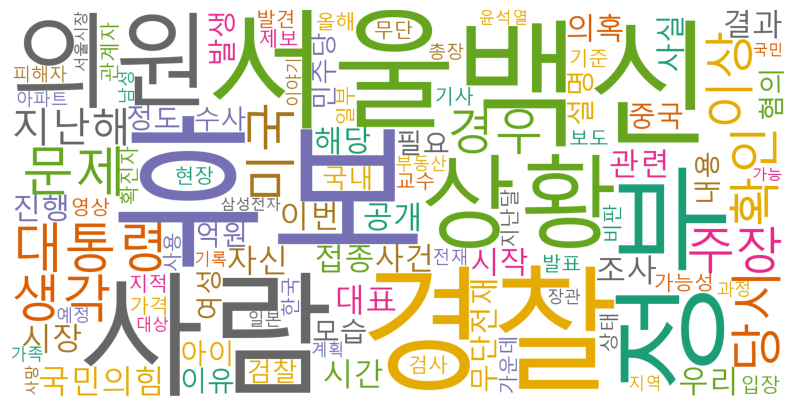

In [76]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(*r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig('C:/marketing/wc/result2.png')